# Translators without Borders

## Test the Spacy method

Make sure that the coreNLP server is running


In [1]:
import TWB
import pandas as pd

In [2]:
# Load the movie reviews dataset
data = pd.read_csv('data/documents', sep='\t', header=None).apply(lambda x: x[0].strip(), axis=1).values

In [3]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [5]:
T = TWB.gen_tokensets(list(data), nlp=nlp)
N = TWB.network_from_tokensets(T, min_docs=1)
A = TWB.annotate_tokens(N, T)
#D = TWB.pdist(TWB.collapse(A), metric='poscorr')
#ND = D / D.sum(axis=1)
#PR = TWB.pagerank(ND)

1386/1386


In [12]:
AD = A.groupby('document_').agg(sum).drop(columns='sentence_')

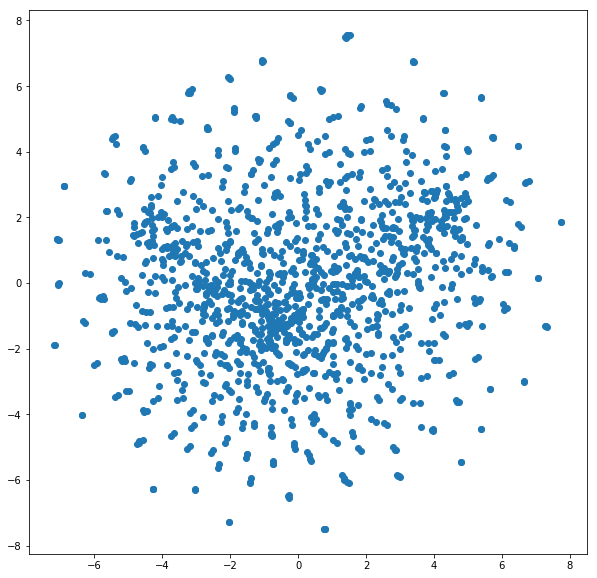

In [13]:
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pylab as plt

tsne = TSNE(n_components=2, n_jobs=4).fit_transform(AD.values)

fig = plt.figure(figsize=(10,10))
plt.scatter(tsne[:,0], tsne[:,1])

(1386, 11913)

## Test FLAIR

In [4]:
import flair
import numpy as np
import pandas as pd
from flair.data import Sentence

In [14]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentPoolEmbeddings, Sentence

# init embedding

# initialize the word embeddings
wiki_embedding = WordEmbeddings('en')
glove_embedding = WordEmbeddings('glove')

# Init the FLAIR embeddings
flair_embedding_forward = FlairEmbeddings('news-forward-fast')
flair_embedding_backward = FlairEmbeddings('news-backward-fast')


# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([wiki_embedding,
                                              glove_embedding])

2019-05-17 16:49:33,672 this function is deprecated, use smart_open.open instead
2019-05-17 16:49:38,482 this function is deprecated, use smart_open.open instead


In [15]:
S = [ Sentence(s) for s in data ]

In [16]:
E = []
for i,s in enumerate(S):
    print("\r%d" % (i), end='')
    document_embeddings.embed(s)
    E.append(s.get_embedding().tolist())
#efor
E = np.array(E)

1385

In [41]:
E = np.array(E)

In [8]:
pd.DataFrame(E).to_pickle('imdb.wiki_glove.pkl')

In [5]:
#E = pd.read_pickle('20ng.wiki_glove.pkl').values

In [17]:
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
X_embedded = TSNE(n_components=2, n_jobs=4).fit_transform(np.array(E))

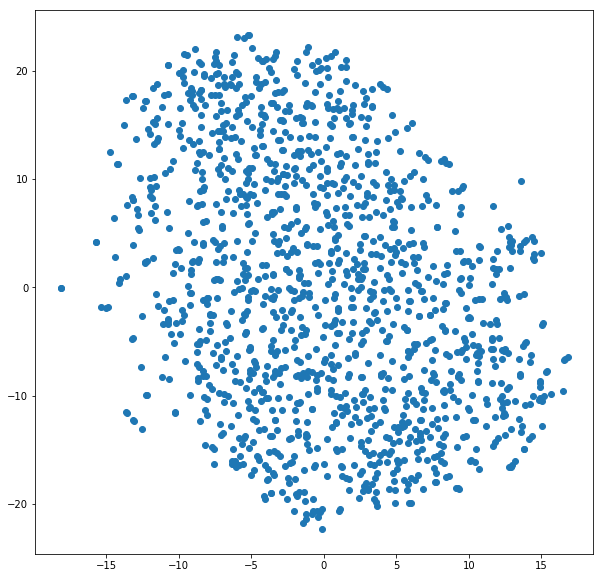

In [20]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

In [138]:
len(set(ng['target'][:len(X_embedded)]))

20

## Test the usenet groups dataset

In [21]:
from sklearn.datasets import fetch_20newsgroups
ng = fetch_20newsgroups()

In [22]:
S = [ Sentence(s) for s in ng['data'] ]

In [23]:
Eng = []
for i,s in enumerate(S):
    print("\r%d" % (i), end='')
    document_embeddings.embed(s)
    Eng.append(s.get_embedding().tolist())
#efor
Eng = np.array(Eng)

11313

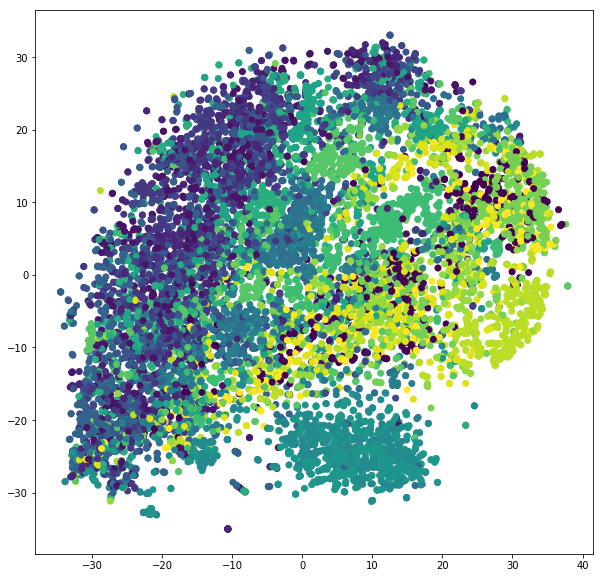

In [25]:
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pylab as plt
tsne_ng = TSNE(n_components=2, n_jobs=4).fit_transform(np.array(Eng))


fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_ng[:,0], tsne_ng[:,1], c=ng['target'])
plt.show()